In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
DIR = os.getcwd() + "/../data2/"

In [13]:
def savePickle(dta, filename):
    with open(filename, "wb") as f: np.save(f, dta)

In [21]:
grabber = "gaussian"
#doc = "depthTile-size243000-newnorm-uf"
doc = "size245000-newnorm-uf"
data_dir = DIR + f"slices/{grabber}-grabber/{doc}/"

In [22]:
fname = "all"
data = np.load(data_dir + fname + ".npy")
labels = np.load(data_dir + fname + "-labels.npy")

In [23]:
print(data.shape)
print(labels.shape)

(1962, 245009)
(1962, 2)


In [17]:
#labels = labels*2 -1
cov_labels = labels[:,0]
csev_labels = labels[:,1] #cov_labels + labels[:,2]
rsev_labels = (cov_labels + csev_labels)#/2
print(cov_labels[0:labels.shape[0]])
print(csev_labels[0:labels.shape[0]])

[1. 1. 1. ... 0. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]


In [23]:
usr_ftrs = data[:,-9:]
mus = np.mean(usr_ftrs, axis=0)
maxs = np.max(abs(usr_ftrs), axis=0)
new_usr_ftrs = (usr_ftrs - mus)/maxs
new_usr_ftrs.shape

(1962, 9)

In [24]:
data[:,245000:] = new_usr_ftrs

In [25]:
labels.shape

(1962, 2)

In [19]:
files = os.listdir(data_dir)
labels = np.load(data_dir + "labels.npy")

In [21]:
files

['batch200.npy',
 'batch100.npy',
 'batch1100.npy',
 'batch600.npy',
 'batch400.npy',
 'batch1700.npy',
 'batch900.npy',
 'batch1400.npy',
 'batch300.npy',
 'batch1000.npy',
 'batch1800.npy',
 'batch1600.npy',
 'batch1900.npy',
 'batch500.npy',
 'batch800.npy',
 'labels.npy',
 'batch1200.npy',
 'batch1300.npy',
 'batch700.npy',
 'batch1500.npy']

In [6]:
plt.imshow(data[10,:,:].reshape(128, -1, 3))

NameError: name 'data' is not defined

In [22]:
batch = 1300
data = np.load(f"{data_dir}batch{batch}.npy")
labels = np.load(f"{data_dir}labels.npy")

In [6]:
preproc = ""
data = np.load(f"{data_dir}{preproc}all.npy")
labels = np.load(f"{data_dir}labels.npy")

In [9]:
cov_labels

array([1., 1., 1., ..., 0., 0., 1.])

In [15]:
rsev_labels[0:100]

array([1., 1., 1., 1., 1., 0., 0., 2., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 2., 2., 1., 0., 0., 2., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       2., 2., 0., 2., 0., 0., 1., 2., 1., 0., 0., 0., 1., 1., 0., 2., 2.,
       2., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 2., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 2., 1., 0., 0., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 0.])

In [86]:
csev_labels[0:100]

array([-1., -1., -1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,  1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1.,  1., -1., -1.])

In [136]:
data.shape

(1400, 132651)

In [16]:
flat_data = np.zeros((batch_size+1, 3*128*128))
for i in range(data.shape[0]):
    #print(np.inf in data[i,:,:,:])
    flat_data[i,:] = data[i,:,:,:].flatten()

NameError: name 'batch_size' is not defined

In [17]:
print(flat_data.shape)
print(csev_labels.shape)

NameError: name 'flat_data' is not defined

In [10]:
preproc = ""

In [7]:
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(data, cov_labels, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, train_size=0.75, random_state=42, shuffle=True)

In [8]:
X_train.shape

(1176, 451, 540)

In [11]:
savePickle(X_train, f"{data_dir}{preproc}X_train.npy")
savePickle(X_test, f"{data_dir}{preproc}X_test.npy")
savePickle(X_val, f"{data_dir}{preproc}X_val.npy")
savePickle(y_train, f"{data_dir}{preproc}y_train.npy")
savePickle(y_test, f"{data_dir}{preproc}y_test.npy")
savePickle(y_val, f"{data_dir}{preproc}y_val.npy")

In [19]:
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(data, csev_labels, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, train_size=0.75, random_state=42, shuffle=True)

In [20]:
savePickle(X_train, f"{data_dir}{preproc}s-X_train.npy")
savePickle(X_test, f"{data_dir}{preproc}s-X_test.npy")
savePickle(X_val, f"{data_dir}{preproc}s-X_val.npy")
savePickle(y_train, f"{data_dir}{preproc}s-y_train.npy")
savePickle(y_test, f"{data_dir}{preproc}s-y_test.npy")
savePickle(y_val, f"{data_dir}{preproc}s-y_val.npy")

In [28]:
from sklearn.model_selection import train_test_split

X_tmp, X_test, y_tmp, y_test = train_test_split(data, rsev_labels, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.25, train_size=0.75, random_state=42, shuffle=True)

In [14]:
savePickle(X_train, f"{data_dir}{preproc}rs-X_train.npy")
savePickle(X_test, f"{data_dir}{preproc}rs-X_test.npy")
savePickle(X_val, f"{data_dir}{preproc}rs-X_val.npy")
savePickle(y_train, f"{data_dir}{preproc}rs-y_train.npy")
savePickle(y_test, f"{data_dir}{preproc}rs-y_test.npy")
savePickle(y_val, f"{data_dir}{preproc}rs-y_val.npy")

In [39]:
np.mean(cov_labels)

0.6025

In [29]:
X_train = np.load(f"{data_dir}s-X_train.npy")
X_val = np.load(f"{data_dir}s-X_val.npy")
X_test = np.load(f"{data_dir}s-X_test.npy")
y_train = np.load(f"{data_dir}s-y_train.npy")
y_val = np.load(f"{data_dir}s-y_val.npy")
y_test = np.load(f"{data_dir}s-y_test.npy")


FileNotFoundError: [Errno 2] No such file or directory: '/media/hwixley/data-drive/mlp-coursework3/stoic-preprocess/../data/slices/gaussian-grabber/size160000-hw40-d100/s-X_train.npy'

In [113]:
X_train.shape

(600, 132651)

In [265]:
from sklearn.model_selection import train_test_split

Xr_tmp, Xr_test, yr_tmp, yr_test = train_test_split(data, rlabels, test_size=0.2, train_size=0.8, random_state=42, shuffle=True)
Xr_train, Xr_val, yr_train, yr_val = train_test_split(Xr_tmp, yr_tmp, test_size=0.25, train_size=0.75, random_state=42, shuffle=True)

In [263]:
dlabels = np.zeros(ns*len(files))
rlabels = np.zeros(ns*len(files))

for i in range(len(files)):
    img = np.load(DIR + "npy-images/" + str(int(labels[i,0])) + ".npy")
    idx = int(img.shape[0]/2)
    data[i*ns,:] = img[idx,:,:].flatten()
    #data[i*ns+1,:] = img[idx+1,:,:].flatten()
    #data[i*ns-1,:] = img[idx-1,:,:].flatten()
    #data[i*ns-2,:] = img[idx-2,:,:].flatten()
    dlabels[i*ns] = int(csev_labels[i])
    rlabels[i*ns] = int(rsev_labels[i])
    #dlabels[i*ns+1] = l
    #dlabels[i*ns-1] = l
    #dlabels[i*ns-2] = l

In [14]:
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error

In [15]:
mod = svm.SVC()
mod.fit(X_train, y_train)
preds = mod.predict(X_val)
print(confusion_matrix(preds, y_val))
print(accuracy_score(preds, y_val))
print(mean_squared_error(preds, y_val))
preds = mod.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))
print(mean_squared_error(preds, y_test))

[[ 49  54   9]
 [111 133  44]
 [  0   0   0]]
0.455
0.6125
[[ 73  46  13]
 [ 87 131  50]
 [  0   0   0]]
0.51
0.5875


In [174]:
mod = GaussianNB()
mod.fit(X_train, y_train)
preds = mod.predict(X_val)
print(confusion_matrix(preds, y_val))
print(accuracy_score(preds, y_val))
print(mean_squared_error(preds, y_val))
preds = mod.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))
print(mean_squared_error(preds, y_test))

[[273  33]
 [ 74  20]]
0.7325
0.2675
[[274  46]
 [ 63  17]]
0.7275
0.2725


In [176]:
mod = BernoulliNB()
mod.fit(X_train, y_train)
preds = mod.predict(X_val)
print(confusion_matrix(preds, y_val))
print(accuracy_score(preds, y_val))
print(mean_squared_error(preds, y_val))
preds = mod.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))
print(mean_squared_error(preds, y_test))

[[248  40]
 [ 99  13]]
0.6525
0.3475
[[261  44]
 [ 76  19]]
0.7
0.3


In [164]:
mod = DecisionTreeClassifier()
mod.fit(X_train, y_train)
preds = mod.predict(X_val)
print(confusion_matrix(preds, y_val))
print(accuracy_score(preds, y_val))
print(mean_squared_error(preds, y_val))
preds = mod.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))
print(mean_squared_error(preds, y_test))

[[141  27]
 [ 26   6]]
0.735
0.265
[[148  20]
 [ 29   4]]
0.7562189054726368
0.24378109452736318


In [175]:
mod = KNeighborsClassifier()
mod.fit(X_train, y_train)
preds = mod.predict(X_val)
print(confusion_matrix(preds, y_val))
print(accuracy_score(preds, y_val))
print(mean_squared_error(preds, y_val))
preds = mod.predict(X_test)
print(confusion_matrix(preds, y_test))
print(accuracy_score(preds, y_test))
print(mean_squared_error(preds, y_test))

[[338  53]
 [  9   0]]
0.845
0.155
[[326  62]
 [ 11   1]]
0.8175
0.1825


In [288]:
from sklearn.linear_model import LinearRegression

In [289]:
mod = svm.SVR()
mod.fit(Xr_train, yr_train)
preds = [(2 if p >= 1.5 else 1) if p >= 0.5 else 0 for p in mod.predict(Xr_val)]
print(confusion_matrix(preds, yr_val))
print(accuracy_score(preds, yr_val))
print(mean_squared_error(preds, yr_val))
preds = [(2 if p >= 1.5 else 1) if p >= 0.5 else 0 for p in mod.predict(Xr_test)]
print(confusion_matrix(preds, yr_test))
print(accuracy_score(preds, yr_test))
print(mean_squared_error(preds, yr_test))

[[1 0 1]
 [6 8 0]
 [0 0 0]]
0.5625
0.625
[[3 0 1]
 [5 5 2]
 [0 0 0]]
0.5
0.6875


In [290]:
mod = LinearRegression()
mod.fit(Xr_train, yr_train)
preds = [(2 if p >= 1.5 else 1) if p >= 0.5 else 0 for p in mod.predict(Xr_val)]
print(confusion_matrix(preds, yr_val))
print(accuracy_score(preds, yr_val))
print(mean_squared_error(preds, yr_val))
preds = [(2 if p >= 1.5 else 1) if p >= 0.5 else 0 for p in mod.predict(Xr_test)]
print(confusion_matrix(preds, yr_test))
print(accuracy_score(preds, yr_test))
print(mean_squared_error(preds, yr_test))

[[3 0 1]
 [4 8 0]
 [0 0 0]]
0.6875
0.5
[[3 0 1]
 [5 5 2]
 [0 0 0]]
0.5
0.6875


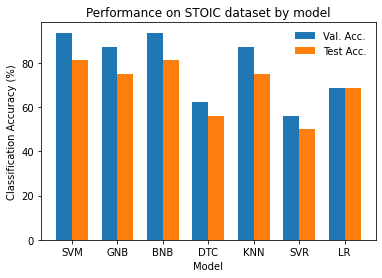

In [297]:
import numpy as np
from matplotlib import pyplot as plt

labels = ['SVM', 'GNB', 'BNB', 'DTC', 'KNN', 'SVR', 'LR']
val_acc = [93.75, 87.5, 93.75, 62.5, 87.5, 56.25, 68.75]
test_acc = [81.25, 75, 81.25, 56.25, 75, 50, 68.75]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

x = np.arange(len(labels))  # the label locations
ax.bar(x - width/2, val_acc, width, label='Val. Acc.')
ax.bar(x + width/2, test_acc, width, label='Test Acc.')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Model')
ax.set_ylabel('Classification Accuracy (%)')
ax.set_title('Performance on STOIC dataset by model')
ax.legend(loc='upper right', frameon=False)
plt.savefig('STOIC.pdf')

plt.show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

labels = ['SVM', 'GNB', 'BNB', 'DTC', 'KNN', 'SVR', 'LR']
val_acc = [67.7, 67.7, 87.1, 74.2, 64.5, 57.5, 74.2]
test_acc = [68.8, 75, 90.6, 81, 50, 62.8, 75]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

x = np.arange(len(labels))  # the label locations

ax.bar(x - width/2, val_acc, width, label='Validation MSE')
ax.bar(x + width/2, test_acc, width, label='Test MSE')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
ax.set_title('Performance on STOIC dataset by model')
ax.legend(loc='upper right', frameon=False)
plt.savefig('STOIC.pdf')

plt.show()

In [ ]:
np.arange(0,512)